49
Country
Germany           760
France            668
Spain             371
Netherlands       249
United Kingdom    223
Austria           145
Switzerland       136
Norway            124
Italy             113
Poland             99
Sweden             76
Belgium            56
Russia             42
Greece             25
Denmark            25
Czechia            23
Finland            22
Portugal           20
United States      14
Ireland            13
Ukraine            11
Estonia            10
Slovenia            9
Slovakia            9
Turkey              8
Belarus             8
Romania             7
Australia           6
Croatia             6
Hungary             6
Bulgaria            5
Serbia              3
Iceland             3
Luxembourg          3
Canada              3
India               3
Lithuania           2
Latvia              2
Albania             2
Cyprus              2
Mexico              2
Kazakhstan          2
Malta               1
Bangladesh          1
Pakistan            1

<Axes: xlabel='Country'>

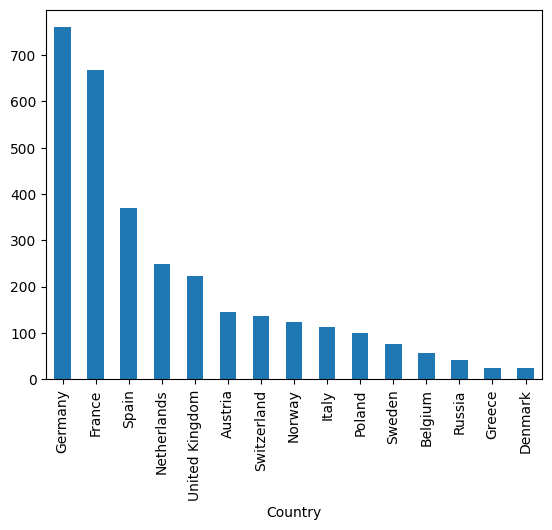

In [5]:
#analysis of country distribution from my datasets
#!pip install matplotlib
import pandas as pd
import matplotlib

#load the data from my locations folder and read the csv files
#I have 10 datasets, so I will read them all
df1 = pd.read_csv('locations/combined_excel_new.csv')

#count the number of each country
country_count = df1["Country"].value_counts()

#print(country_count)
#show total number of rows
print(country_count.count())
print(country_count)
#show the number of unique countries


#plot the data
#country_count.plot(kind='bar')
#show only the top 10 countries
#country_count[:15].plot(kind='bar')
country_count[:15].plot(kind='bar')

#country_count[10:30].plot(kind='bar', color='red')

In [3]:
import pandas as pd
import requests
from requests.structures import CaseInsensitiveDict

# Replace 'YOUR_API_KEY' with your actual Geoapify API key
api_key = 'edb8cde1acdc48f39b75476ff37d05f3'

# Load the csv file
df = pd.read_csv('locations/combined_excel_new.csv')

# Define the API endpoint
base_url = 'https://api.geoapify.com/v1/geocode/search'

# Define the headers for the API request
headers = CaseInsensitiveDict()
headers['Accept'] = 'application/json'

# Initialize an empty list to store country information
countries = []

# Loop through each address to retrieve the country
for index, row in df.iterrows():
    address = row['Full Address']

    if pd.isnull(address):
        countries.append(None)
        continue

    # Define the parameters for the API request
    params = {
        'text': address,
        'apiKey': api_key,
        'lang': 'en',  # Set the language to English
        'limit': 1,  # Set the limit to 1 to get the first result
        'type': 'amenity'  # Set the location type to amenity (you can adjust this based on your needs)
    }

    # Send the API request
    response = requests.get(base_url, params=params, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()

        # Check if 'features' list is not empty
        if len(response_data['features']) > 0:
            # Extract the country from the response
            country = response_data['features'][0]['properties']['country']

            # Append the country to the list
            countries.append(country)

            # Print the address and country for each successful request
            print(f"Address: {address}")
            print(f"Country: {country}")
            print()
        else:
            print(f"No results found for address: {address}")
            countries.append(None)
    else:
        print(f"Error geocoding address: {address}")
        countries.append(None)

# Create a new column in the DataFrame to store the country information
df['Country'] = countries
print("Country information added to the DataFrame.")

Address: WEIßERDSTR., 65520, Limburg-Weilburg, Deutschland
Country: Germany

Address: BRIXENTALERSTRAßE 67, 6300, Tirol, Österreich
Country: Austria

Address: A VIPE 0 IRAKLIOU, NEA ALIKARNASSOS, HERAKLION - CRETE, 716 01, Greece
Country: Greece

Address: Mieczysława Pożaryskiego 28, 04-703 Warszawa, Poland
Country: Poland

Address: Av. Duque de Loulé 5 6ºC, Lisbon, 1050-085, Portugal
Country: Portugal

No results found for address: Unit 1 Sycamore Ct, Warrington Rd, Runcorn WA7 1RS, United Kingdom
Address: BENZSTR. 3, 48619, Borken, Deutschland
Country: Germany

Address: Piekarska 86, 43-300 Bielsko-Bia?a
Country: Poland

Address: 199 RUE DE LA BOUGRIERE- 44980 SAINTE LUCE SUR LOIRE -
Country: France

Address: 4b rue François de Curel 57000 Metz
Country: France

Address: 25 RUE DE LA COTE A PIGEON, 95420, Val-d'Oise, Frankreich
Country: France

Address: PARC DE PONTILLAULT, RUE DE ROME, 77340, Seine-et-Marne, Frankreich
Country: France

Address: RTE DE TRAMELAN 19, 2610, Bern, Schweiz

In [4]:
# Save the updated DataFrame to a new CSV file
df.to_csv('locations/combined_excel_new.csv', index=False)

print("Country information added to the DataFrame.")

Country information added to the DataFrame.


In [2]:
!pip install googletrans
from googletrans import Translator
import pandas as pd

# Read the CSV file
df = pd.read_csv('locations/location_amadeus.csv')

# Create a translator object
translator = Translator()

# Country code to country name mapping dictionary for European countries
european_countries = {
    'AL': 'Albania',
    'AD': 'Andorra',
    'AM': 'Armenia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan',
    'BY': 'Belarus',
    'BE': 'Belgium',
    'BA': 'Bosnia and Herzegovina',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IE': 'Ireland',
    'IT': 'Italy',
    'KZ': 'Kazakhstan',
    'LV': 'Latvia',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'MD': 'Moldova',
    'MC': 'Monaco',
    'ME': 'Montenegro',
    'NL': 'Netherlands',
    'MK': 'North Macedonia',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'RU': 'Russia',
    'SM': 'San Marino',
    'RS': 'Serbia',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'VA': 'Vatican City'
}

# Translate the "Land" column
def translate_country_code(code):
    return european_countries.get(code, None)

df['Country'] = df['Länderkürzel'].apply(translate_country_code)

# Save the translated DataFrame to a new CSV file
df.to_csv('locations/location_amadeus.csv', index=False)


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 55.1/55.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.

In [45]:
dfx = pd.read_excel('locations/combined_excel.xlsx')
dfx

dfx.to_csv('locations/location.csv', index=False)

In [4]:
#transform into excel files
import pandas as pd
df1 = pd.read_csv('locations/location_amadeus.csv')


df1.to_excel('locations/location_amadeus.xlsx', index=False)